In [1]:
# Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt




In [2]:
# -------------------- CONFIGURATION SECTION --------------------

# Base directory where the MURA dataset is stored
BASE_DIR = "D:/collage project/fracture detection comp vision/MURA-v1.1"

# Which subsets we want to process
SUBSETS = ['train', 'valid']  # Training and Validation sets

# Body parts available in MURA dataset
BODY_PARTS = ['XR_ELBOW', 'XR_FINGER', 'XR_FOREARM', 'XR_HAND', 
              'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST']

# Image size that will match VGG16 model input requirement
IMAGE_SIZE = (224, 224)


In [3]:
# -------------------- MAIN FUNCTIONS --------------------

def load_mura_dataset(base_dir, subsets, body_parts):
    """
    Load only image paths and labels for MURA dataset.
    This function does NOT load images into memory to avoid MemoryError.

    Args:
        base_dir (str): Base directory where MURA dataset is located
        subsets (list): List containing 'train' and 'valid' subset names
        body_parts (list): List of body parts (XR_ELBOW, XR_HAND, etc.)

    Returns:
        dict: A dictionary containing image paths and corresponding labels for train and valid sets
    """
    # Initialize empty dictionary to store data
    data = {'train': {'paths': [], 'labels': []},
            'valid': {'paths': [], 'labels': []}}
    
    # Loop over subsets (train/valid)
    for subset in subsets:
        print(f"\nProcessing {subset} set...")

        # Loop over body parts inside each subset
        for body_part in body_parts:
            body_part_dir = os.path.join(base_dir, subset, body_part)

            # Skip if body part directory doesn't exist
            if not os.path.exists(body_part_dir):
                print(f"Warning: {body_part_dir} not found. Skipping...")
                continue

            # Get list of all patient folders
            patients = [d for d in os.listdir(body_part_dir) if os.path.isdir(os.path.join(body_part_dir, d))]

            # Loop over patients
            for patient in tqdm(patients, desc=f"{body_part}"):
                patient_dir = os.path.join(body_part_dir, patient)

                # Get list of all studies for that patient
                studies = [d for d in os.listdir(patient_dir) if os.path.isdir(os.path.join(patient_dir, d))]

                # Loop over studies
                for study in studies:
                    study_dir = os.path.join(patient_dir, study)

                    # Assign label: 0 for negative, 1 for positive
                    label = 0 if 'negative' in study.lower() else 1

                    # Loop over all images inside study
                    for img_file in os.listdir(study_dir):
                        # Consider only image files
                        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                            img_path = os.path.join(study_dir, img_file)

                            # Save path and label into our data dictionary
                            data[subset]['paths'].append(img_path)
                            data[subset]['labels'].append(label)

    print("\n✅ Dataset paths and labels loaded successfully.")
    return data

🔍 Loading dataset paths and labels...

Processing train set...


XR_WRIST: 100%|██████████| 3267/3267 [00:00<00:00, 4619.69it/s]



Processing valid set...


XR_WRIST: 100%|██████████| 207/207 [00:00<00:00, 3286.51it/s]



✅ Dataset paths and labels loaded successfully.

Visualizing train set (showing first 5 samples)

📊 Basic Statistics:
Total images: 36812
Fracture cases: 14873
Normal cases: 21939
Class balance: 40.40% fractures

🖼️ Sample Images:


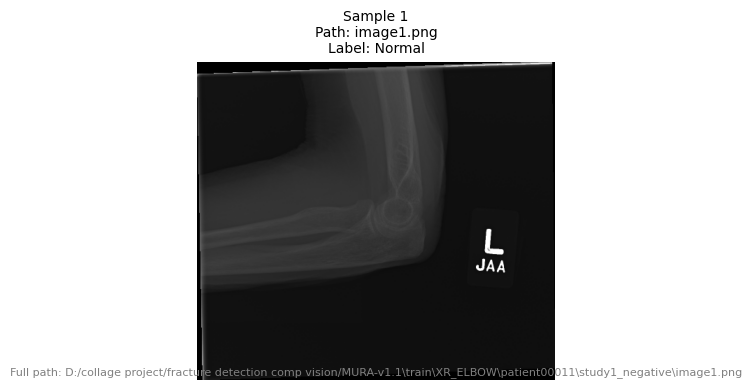


Sample 1:
Shape: (456, 512, 3)
Label: 0 (Normal)
Path: D:/collage project/fracture detection comp vision/MURA-v1.1\train\XR_ELBOW\patient00011\study1_negative\image1.png


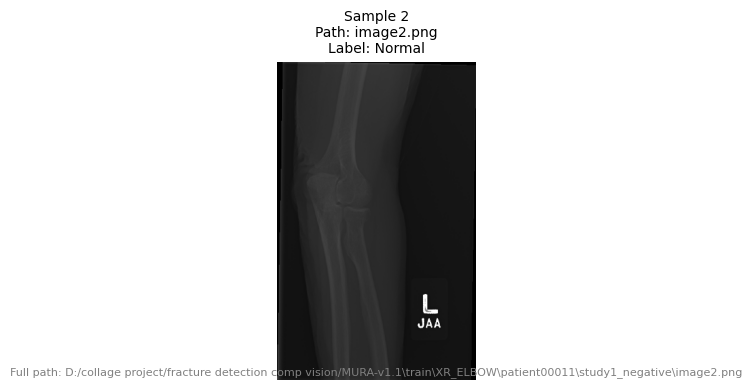


Sample 2:
Shape: (512, 319, 3)
Label: 0 (Normal)
Path: D:/collage project/fracture detection comp vision/MURA-v1.1\train\XR_ELBOW\patient00011\study1_negative\image2.png


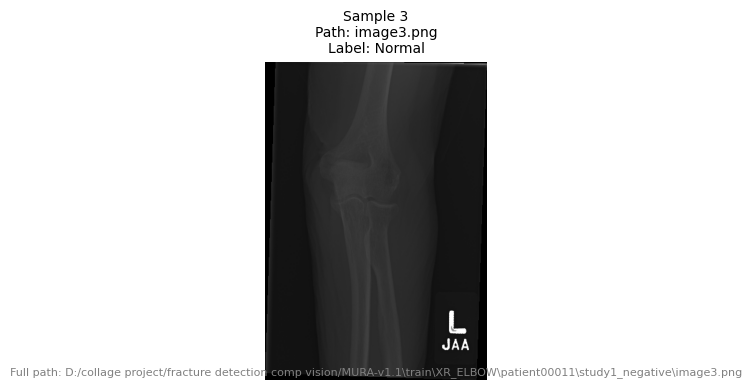


Sample 3:
Shape: (512, 357, 3)
Label: 0 (Normal)
Path: D:/collage project/fracture detection comp vision/MURA-v1.1\train\XR_ELBOW\patient00011\study1_negative\image3.png


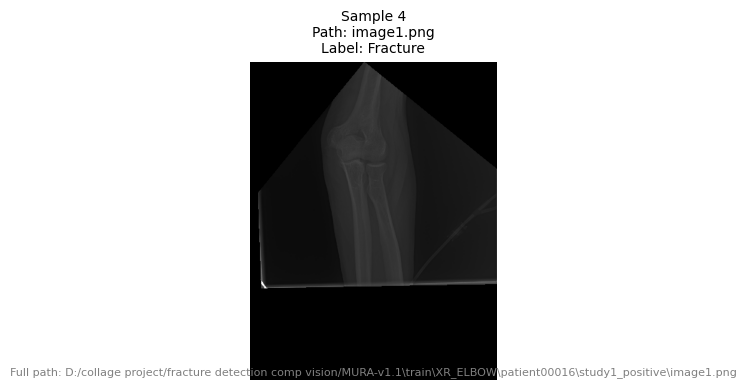


Sample 4:
Shape: (512, 396, 3)
Label: 1 (Fracture)
Path: D:/collage project/fracture detection comp vision/MURA-v1.1\train\XR_ELBOW\patient00016\study1_positive\image1.png


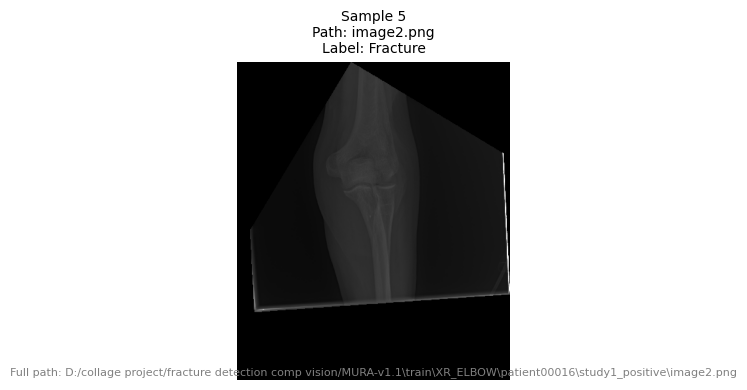


Sample 5:
Shape: (512, 438, 3)
Label: 1 (Fracture)
Path: D:/collage project/fracture detection comp vision/MURA-v1.1\train\XR_ELBOW\patient00016\study1_positive\image2.png

Visualizing valid set (showing first 5 samples)

📊 Basic Statistics:
Total images: 3197
Fracture cases: 1530
Normal cases: 1667
Class balance: 47.86% fractures

🖼️ Sample Images:


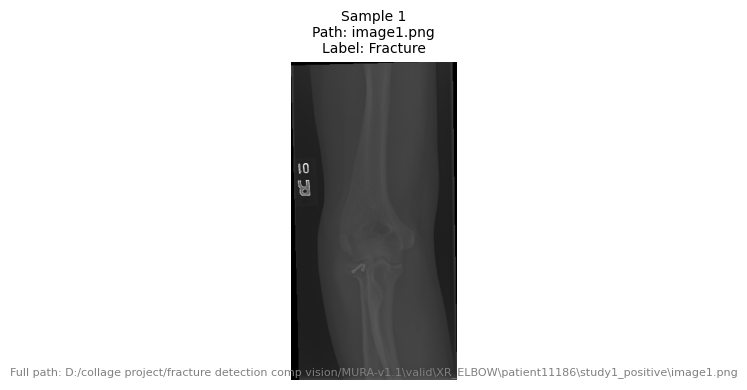


Sample 1:
Shape: (512, 266, 3)
Label: 1 (Fracture)
Path: D:/collage project/fracture detection comp vision/MURA-v1.1\valid\XR_ELBOW\patient11186\study1_positive\image1.png


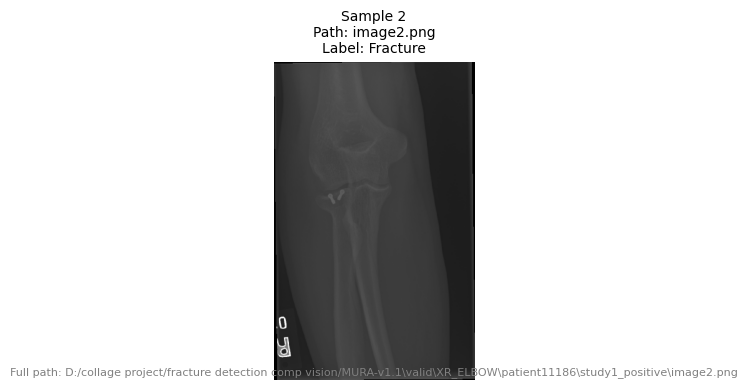


Sample 2:
Shape: (512, 322, 3)
Label: 1 (Fracture)
Path: D:/collage project/fracture detection comp vision/MURA-v1.1\valid\XR_ELBOW\patient11186\study1_positive\image2.png


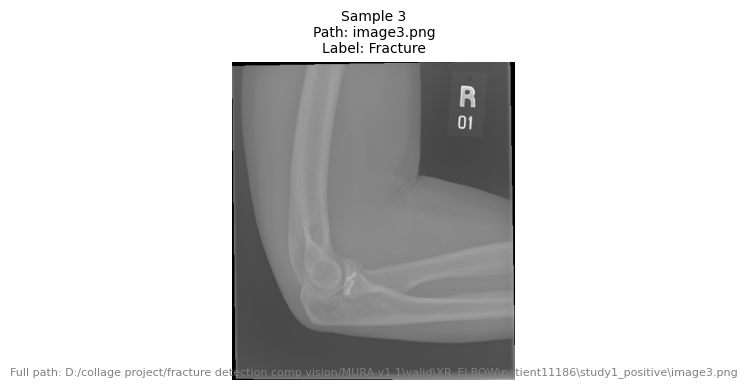


Sample 3:
Shape: (512, 455, 3)
Label: 1 (Fracture)
Path: D:/collage project/fracture detection comp vision/MURA-v1.1\valid\XR_ELBOW\patient11186\study1_positive\image3.png


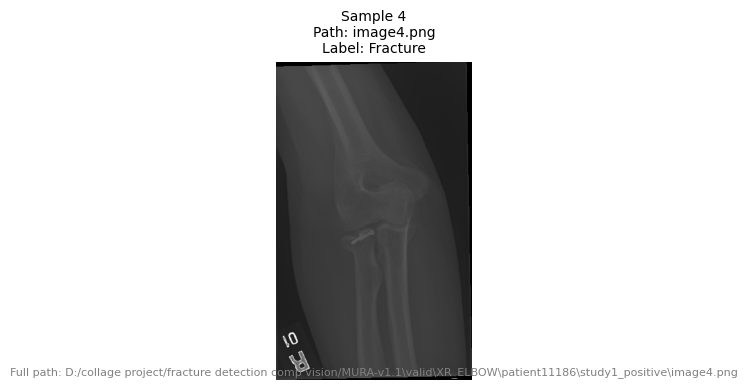


Sample 4:
Shape: (512, 315, 3)
Label: 1 (Fracture)
Path: D:/collage project/fracture detection comp vision/MURA-v1.1\valid\XR_ELBOW\patient11186\study1_positive\image4.png


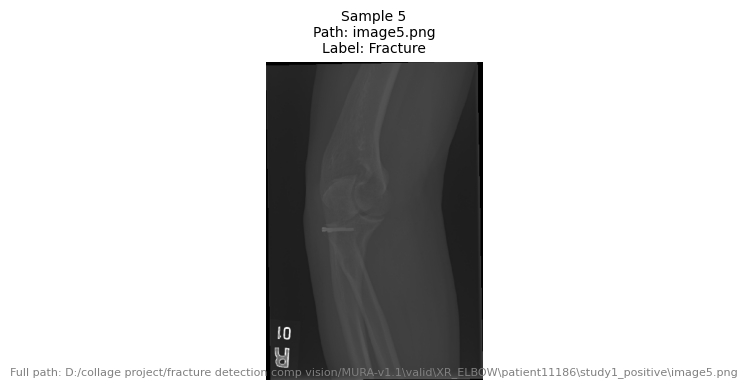


Sample 5:
Shape: (512, 348, 3)
Label: 1 (Fracture)
Path: D:/collage project/fracture detection comp vision/MURA-v1.1\valid\XR_ELBOW\patient11186\study1_positive\image5.png


In [4]:
def visualize_mura_dataset(data, subset='train', num_samples=5):
    """
    Visualize samples from the loaded MURA dataset (path-based version)
    
    Args:
        data (dict): Dataset dictionary containing paths and labels
        subset (str): Which subset to visualize ('train' or 'valid')
        num_samples (int): Number of samples to visualize
    """
    print(f"\n{'='*50}")
    print(f"Visualizing {subset} set (showing first {num_samples} samples)")
    print(f"{'='*50}")
    
    # Get paths and labels for the subset
    paths = data[subset]['paths']
    labels = data[subset]['labels']
    
    # Basic statistics
    print(f"\n📊 Basic Statistics:")
    print(f"Total images: {len(paths)}")
    print(f"Fracture cases: {sum(labels)}")
    print(f"Normal cases: {len(labels) - sum(labels)}")
    print(f"Class balance: {sum(labels)/len(labels):.2%} fractures")
    
    # Visualize sample images
    print("\n🖼️ Sample Images:")
    for i in range(min(num_samples, len(paths))):
        try:
            # Load image on-demand
            img = cv2.imread(paths[i])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Create figure
            plt.figure(figsize=(8, 4))
            
            # Show image
            plt.imshow(img)
            plt.title(f"Sample {i+1}\nPath: {os.path.basename(paths[i])}\nLabel: {'Fracture' if labels[i] else 'Normal'}",
                     fontsize=10)
            plt.axis('off')
            
            # Add text box with full path
            plt.gcf().text(0.5, 0.05, f"Full path: {paths[i]}", 
                          ha='center', fontsize=8, color='gray')
            
            plt.tight_layout()
            plt.show()
            
            # Print diagnostic info
            print(f"\nSample {i+1}:")
            print(f"Shape: {img.shape}")
            print(f"Label: {labels[i]} ({'Fracture' if labels[i] else 'Normal'})")
            print(f"Path: {paths[i]}")
            
        except Exception as e:
            print(f"\n⚠️ Error visualizing {paths[i]}: {str(e)}")

# Load the dataset (path-based)
print("🔍 Loading dataset paths and labels...")
mura_data = load_mura_dataset(BASE_DIR, SUBSETS, BODY_PARTS)

# Visualize both subsets
for subset in SUBSETS:
    if mura_data[subset]['paths']:  # Only visualize if data exists
        visualize_mura_dataset(mura_data, subset)
    else:
        print(f"\n❌ No data found for {subset} set!")